## Step 1: Setup and Explore Available Classes

In [9]:
# First, I’ll import some libraries I’ll need throughout this notebook
import os
from collections import Counter

# I’ll also import some later-used visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# This is the raw folder that contains all unprocessed class folders
raw_path = '../data/Raw/plant_leave_diseases_dataset_without_augmentation'

# Let me list all the folders (each folder = 1 class)
classes = sorted([
    folder for folder in os.listdir(raw_path)
    if os.path.isdir(os.path.join(raw_path, folder))
])

# I want to see how many classes are there and what are their names
print("Total number of classes:", len(classes))
print("Available classes in Raw folder:", classes)

Total number of classes: 39
Available classes in Raw folder: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mit

## Step 2: Image Count per Class + Distribution Chart

Sample counts:
Apple___Apple_scab: 630 images
Apple___Black_rot: 621 images
Apple___Cedar_apple_rust: 275 images
Apple___healthy: 1645 images
Background_without_leaves: 1143 images


C:\Users\User\AppData\Local\Temp\ipykernel_28044\311078624.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


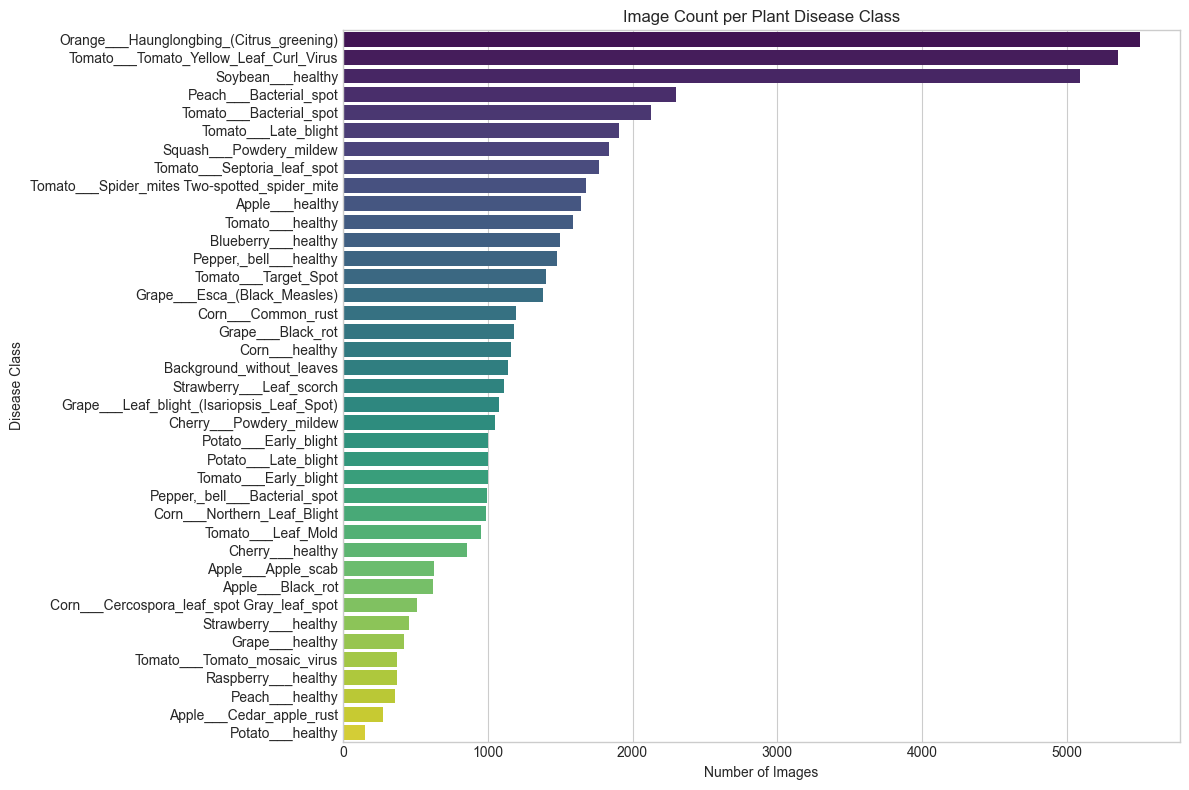

In [10]:
# I want to count how many images are inside each class folder
image_counts = {}

for cls in classes:
    folder_path = os.path.join(raw_path, cls)
    count = len([
        file for file in os.listdir(folder_path)
        if file.lower().endswith(('.png', '.jpg', '.jpeg'))
    ])
    image_counts[cls] = count

# Just to confirm: print the top few counts
print("Sample counts:")
for cls in list(image_counts)[:5]:
    print(f"{cls}: {image_counts[cls]} images")

# I’ll sort the classes by number of images (descending) so the plot looks clean
sorted_counts = dict(sorted(image_counts.items(), key=lambda item: item[1], reverse=True))

# Now plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    y=list(sorted_counts.keys()),
    x=list(sorted_counts.values()),
    palette="viridis"
    sns.barplot(
    y=list(sorted_counts.keys()),
    x=list(sorted_counts.values()),
    hue=list(sorted_counts.keys()),  
    palette="viridis",
    dodge=False,                      
    legend=False  
)

)
plt.title("Image Count per Plant Disease Class")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.show()